# Time in Python

Dealing with dates and times are not always the easiest thing. One of the built-in modules to Python is the datetime package, which has robust methods for dealing with all sorts of date related needs. This notebook will hit some of the main highlights of working with dates in Python.

For full information on the datetime module visit the documentation pages: https://docs.python.org/3/library/datetime.html

## Importing Datetime Module

The import statement is a little different from most of the imports that we do for Python modules as the name of the specific module we want to import is the same as the package itself.

Documentation Page: https://docs.python.org/3/library/datetime.html#datetime-objects

Examples of Datetime Usage: https://docs.python.org/3/library/datetime.html#examples-of-usage-datetime

In [5]:
# from datetime import datetime
from datetime import datetime, timezone
from datetime import datetime, UTC
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Pull time from computer
d = datetime.now(UTC)
print(d)

d_local = datetime.now()
print(d_local)

print(f'{d:%Y-%m-%d %H:%M:%S}')
print(f'{d:%Y%m%d}')

2025-09-28 18:29:34.566137+00:00
2025-09-28 14:29:34.566373
2025-09-28 18:29:34
20250928


## Construct Datetime Object

You can make any date/time into a datetime object

Format of datetime function call: `datetime(<year>, <month>, <day>, <hour>, <minute>)`


In [8]:
# Construct a datetime object
# Format of datetime function call: datetime(<year>, <month>, <day>, <hour>, <minute>)
drlbday = datetime(1963, 1, 10)  
print(drlbday)

#add hour, min, sec
drlbday = datetime(1963, 1, 10, 10, 30, 20) 
print(drlbday)
print(type(drlbday))

1963-01-10 00:00:00
1963-01-10 10:30:20
<class 'datetime.datetime'>


## Get pieces of date out

Year: ```date.year```

Month: ```date.month```

Day: ```date.day```

Hour: ```date.hour```

Minute: ```date.minute```

Second: ```date.second```

These methods will give you the numeric value of each part of the datetime object.

In [36]:
print(drlbday.month)
print(drlbday.year)

1
1963


## Create Datetime Object from String Value

Maybe you get a a date as a string, say from an ```input()``` function call, you can use a function from datetime to make that into a datetime object.

In [9]:
dstring = '2025-09-29'
date = datetime.strptime(dstring, '%Y-%m-%d')
print(date)
#Lets take a look at the variable type
print(type(dstring))
print(type(date))

2025-09-29 00:00:00
<class 'str'>
<class 'datetime.datetime'>


## Date Calculations

What was the date five days ago?

What will the date be five days from now?

The timedelta module, part of the datetime package, can be used to perform simple date calculations

In [10]:
from datetime import timedelta

# What was the day/month/year of four days ago
print(d - timedelta(days=4))
print(d - timedelta(hours=4))
print(d - timedelta(weeks=4))

2025-09-24 18:29:34.566137+00:00
2025-09-28 14:29:34.566137+00:00
2025-08-31 18:29:34.566137+00:00


## Advanced Subsetting

Working with time series data can be difficult because of dates. Dates are a unique format that are not integers, strings, or floating point numbers. Some motivating questions as we work with data that includes dates:
* So how do we successfully read in a column that contains dates?
* How can we subset using dates?

Let's begin by reading in our ORD data that we have been working with and we'll need to use two separate read statements because of the different formats of our dates from the rest of our data.

In Numpy, the data type (dtype) for our dates is `np.datetime64`. We'll have to specify that data type when we read in our data using the `dtype` keyword argument.

More information about Numpy datetime64: https://numpy.org/doc/stable/reference/arrays.datetime.html


In [11]:
# First read in our data only bringing in some of the columns
path = '/Users/slazarus_admin/Library/CloudStorage/OneDrive-FloridaInstituteofTechnology/MET3601/WEEK_6/'
file = 'ord_2010_data.csv'
ord_data = np.loadtxt(path + file, skiprows=2, usecols=[1,2,3,4], delimiter=',')

In [12]:
!head -10 ord_2010_data.csv     #can open a file in another directory (add path or ..)

CHICAGO OHARE IN0.0001L AP
date,mint,avgt,maxt,pcpn,snow,snwd
2010-01-01,5,10.5,16,0.0001,0.0001,2
2010-01-02,2,6.5,11,0.00,0.0,2
2010-01-03,-1,8.5,18,0.0001,0.0001,2
2010-01-04,7,12.5,18,0.0001,0.0001,2
2010-01-05,13,18.0,23,0.0001,0.0001,2
2010-01-06,10,15.0,20,0.01,0.1,2
2010-01-07,16,19.0,22,0.27,3.9,3
2010-01-08,11,19.0,27,0.27,3.5,8


While the Numpy datetime64 data type is just fine, I prefer working with native Python datetime objects. We can convert the dates Numpy array to an array containing datetime objects by converting the types. It's a little wonky because you first have to convert to a `datetime64[ms]`, which is a millisecond format, then to the datetime object or `'O'`.

In [13]:
# Convert to Datetime Objects

#ord_dates = np.loadtxt(path+file, skiprows=2, usecols=[0],delimiter=',')  #doesn't work!
#Try
ord_dates = np.loadtxt(path+file, skiprows=2, usecols=[0],delimiter=',',dtype=np.datetime64)

print(ord_dates)
print(type(ord_dates))  #numpy array of strings want to convert to datetine..

['2010-01-01' '2010-01-02' '2010-01-03' '2010-01-04' '2010-01-05'
 '2010-01-06' '2010-01-07' '2010-01-08' '2010-01-09' '2010-01-10'
 '2010-01-11' '2010-01-12' '2010-01-13' '2010-01-14' '2010-01-15'
 '2010-01-16' '2010-01-17' '2010-01-18' '2010-01-19' '2010-01-20'
 '2010-01-21' '2010-01-22' '2010-01-23' '2010-01-24' '2010-01-25'
 '2010-01-26' '2010-01-27' '2010-01-28' '2010-01-29' '2010-01-30'
 '2010-01-31' '2010-02-01' '2010-02-02' '2010-02-03' '2010-02-04'
 '2010-02-05' '2010-02-06' '2010-02-07' '2010-02-08' '2010-02-09'
 '2010-02-10' '2010-02-11' '2010-02-12' '2010-02-13' '2010-02-14'
 '2010-02-15' '2010-02-16' '2010-02-17' '2010-02-18' '2010-02-19'
 '2010-02-20' '2010-02-21' '2010-02-22' '2010-02-23' '2010-02-24'
 '2010-02-25' '2010-02-26' '2010-02-27' '2010-02-28' '2010-03-01'
 '2010-03-02' '2010-03-03' '2010-03-04' '2010-03-05' '2010-03-06'
 '2010-03-07' '2010-03-08' '2010-03-09' '2010-03-10' '2010-03-11'
 '2010-03-12' '2010-03-13' '2010-03-14' '2010-03-15' '2010-03-16'
 '2010-03-

In [15]:
#Convert to datetime objects from numpy format to native python time string (will make it easier to subset)
dates = ord_dates.astype('datetime64[ms]').astype('O')  #Capital letter O not zero! Converts to object
#print(dates)

Now we can work to subset our arrays based on datetime objects that are a bit easier to use than trying to figure out what index value would correspond to the Julian day.

Let's grab all of the data for summer, which would be all of the dates between June 21 and September 22. We'll need check our dates based on the dates array, then use the result (which would be a boolean array) to then subset the array containing our data. We'll also subset our dates array to use that for plotting purposes.

In [16]:
# Now that they are objects set the start and end date that we want to subset...
start_date = datetime(2010, 6, 21)  #Solstice
end_date   = datetime(2010, 9, 21)  #Equinox

# Set a subset boolean array based on the combination of wanting the dates on and after our start date
# to on or before the end date. This means we'll need an & to find that intersection of data
subset = (dates >= start_date)&(dates <= end_date) #This returns a boolean array
#print(subset)
print(subset.shape)

# Subset our data array
summer_data = ord_data[subset]
# print(summer_data)
print(summer_data.shape)   #2D
# Subset the dates using the same method
summer_dates = dates[subset]
#print(summer_dates)
print(summer_dates.shape)  #1D

(365,)
(93, 4)
(93,)


Now let's plot all of the summer maximum temperatures that we previously subset, knowing that the maximum temperature is in the third column (index = 2).

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

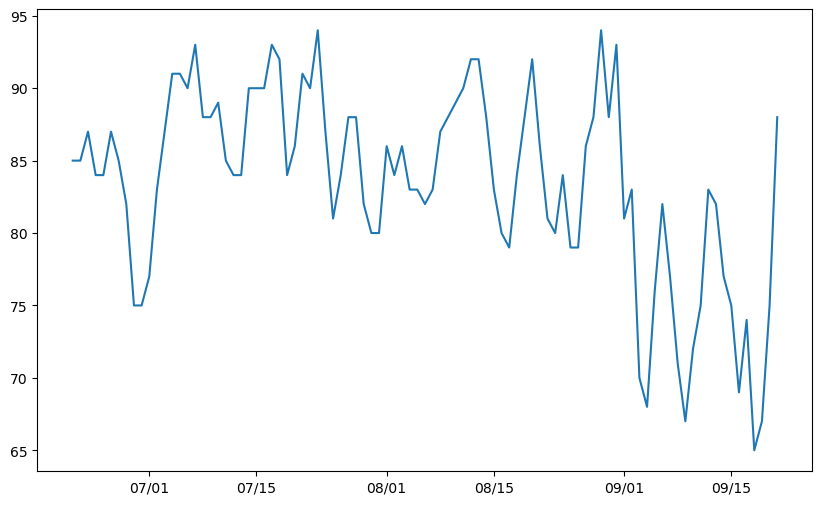

In [21]:
plt.figure(1,figsize=(10,6))
ax = plt.subplot(111)
fmt = mdates.DateFormatter('%m/%d')  # could use ':' as a separator, could add year (y or Y) but...
ax.xaxis.set_major_formatter(fmt)
ax.plot(summer_dates, summer_data[:,2])
plt.show()

## Exercise #1

Plot the max, min, and average temperature for spring (March 20 to June 20) all on the same plot. Be sure to properly label all elements of your plot including acis labels, title, and legend.

## Exercise #2

Create one figure that contains three different axes for the max, average, and min temperature for spring, summer, and fall. Each axes should have the separate season.